In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Just Looking

In [12]:
df = pd.read_csv('data/webmd.csv')
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


### From Other Notebook

In [13]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.drop_duplicates('Reviews')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250168 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            250167 non-null  object        
 1   Condition      250168 non-null  object        
 2   Date           250168 non-null  datetime64[ns]
 3   Drug           250168 non-null  object        
 4   DrugId         250168 non-null  int64         
 5   EaseofUse      250168 non-null  int64         
 6   Effectiveness  250168 non-null  int64         
 7   Reviews        250167 non-null  object        
 8   Satisfaction   250168 non-null  int64         
 9   Sex            250168 non-null  object        
 10  Sides          250168 non-null  object        
 11  UsefulCount    250168 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 24.8+ MB


# All Osteoporosis Illnesses in Female Patients

In [14]:

df_ost = df[df['Condition'].str.contains("osteoporosis", case = False)]

In [15]:
len(df_ost)

1357

In [16]:
print('number of reviews: ', df.shape)
print("number of males: ", sum(df['Sex'] == 'Male'))
print("number of females: ", sum(df['Sex'] == 'Female'))
print('list of conditions: \n', df['Condition'].unique())
print('number of conditions: ', df['Condition'].unique().shape)
print('number of drugs: ', df['Drug'].unique().shape)
print(min(df['Date']))
print(max(df['Date']))

number of reviews:  (250168, 12)
number of males:  61657
number of females:  170847
list of conditions: 
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Sore Mouth due to Dentures or Poor Oral Hygiene' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']
number of conditions:  (1723,)
number of drugs:  (6111,)
2007-09-17 00:00:00
2020-03-07 00:00:00


# ONLY Osteoporosis

In [17]:
#Recoding Age
'''df_ost["Age"] = df_ost["Age"].replace(
    ["25-34","45-54","65-74","75 or over","55-64","35-44","19-24","13-18","7-12", ""], 
    ["Under 45","45-54", "65-74", "75+", "55-64", "Under 45", "Under 45", "Under 45", "Under 45", "Blank"])'''

'df_ost["Age"] = df_ost["Age"].replace(\n    ["25-34","45-54","65-74","75 or over","55-64","35-44","19-24","13-18","7-12", ""], \n    ["Under 45","45-54", "65-74", "75+", "55-64", "Under 45", "Under 45", "Under 45", "Under 45", "Blank"])'

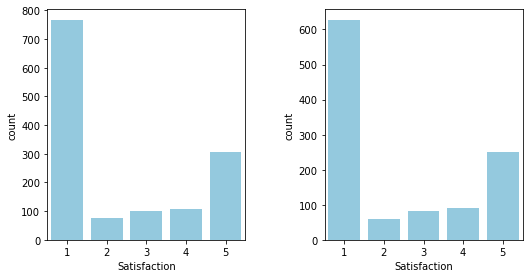

In [18]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost, ax = axs[0])
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost[df_ost['Sex'] == 'Female'], ax = axs[1])
#axs[1].set_xlabel('Satisfaction')
#axs[0].set_ylabel('Count')
#axs[0].set_title('Distribution of average drug satisfaction  \n General Female')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [20]:
'''df_drug_reclast = df_ost.loc[df_ost['Drug'].str.contains("reclast bottle, infusion", case=False)]
df_drug_zometa = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]
df_drug_prolia = df_ost.loc[df_ost['Drug'].str.contains("zometa vial", case=False)]
#df_drug4 = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]

df_drugs = pd.concat([df_drug_reclast,df_drug_zometa,df_drug_prolia])

sns.lineplot(x = 'Year', y = 'Satisfaction', hue = 'Drug', data=df_drugs.groupby(["Year", "Drug"])["Satisfaction"].mean().reset_index())'''

'df_drug_reclast = df_ost.loc[df_ost[\'Drug\'].str.contains("reclast bottle, infusion", case=False)]\ndf_drug_zometa = df_ost.loc[df_ost[\'Drug\'].str.contains("actonel 35 mg tablet", case=False)]\ndf_drug_prolia = df_ost.loc[df_ost[\'Drug\'].str.contains("zometa vial", case=False)]\n#df_drug4 = df_ost.loc[df_ost[\'Drug\'].str.contains("actonel 35 mg tablet", case=False)]\n\ndf_drugs = pd.concat([df_drug_reclast,df_drug_zometa,df_drug_prolia])\n\nsns.lineplot(x = \'Year\', y = \'Satisfaction\', hue = \'Drug\', data=df_drugs.groupby(["Year", "Drug"])["Satisfaction"].mean().reset_index())'

# Bin 0-54, 55-64, 65-74, 75+

In [21]:
bin_age = []

for age in df_ost['Age']:
    if age == '7-12':
        bin_age.append('0-44')
    elif age == '13-18':
        bin_age.append('0-44')
    elif age == '19-24':
        bin_age.append('0-44')
    elif age == '25-34':
        bin_age.append('0-44')
    elif age == '35-44':
        bin_age.append('0-44')
    elif age == '45-54':
        bin_age.append('45-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65-74')
    elif age == '75 or over':
        bin_age.append('75+')
    else:
        bin_age.append('Blank')

df_ost['Age'] = bin_age

C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_19536\490762108.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost['Age'] = bin_age


In [22]:
df_ost['Age'].unique()

array(['0-44', '45-54', '65-74', '75+', '55-64', 'Blank'], dtype=object)

<AxesSubplot:title={'center':'Count Across Age Group'}, xlabel='Age', ylabel='count'>

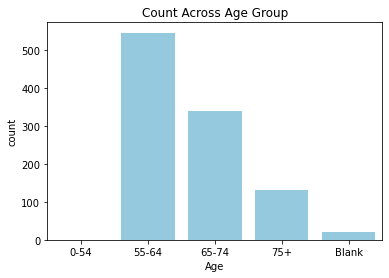

In [23]:
plt.title('Count Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["0-54", "55-64", "65-74", "75+", "Blank"])

<AxesSubplot:title={'center':'Ratings for Women Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

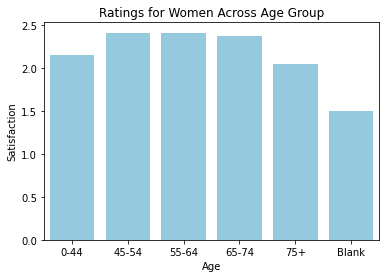

In [24]:
plt.title('Ratings for Women Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost[df_ost['Sex'] == 'Female'].groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

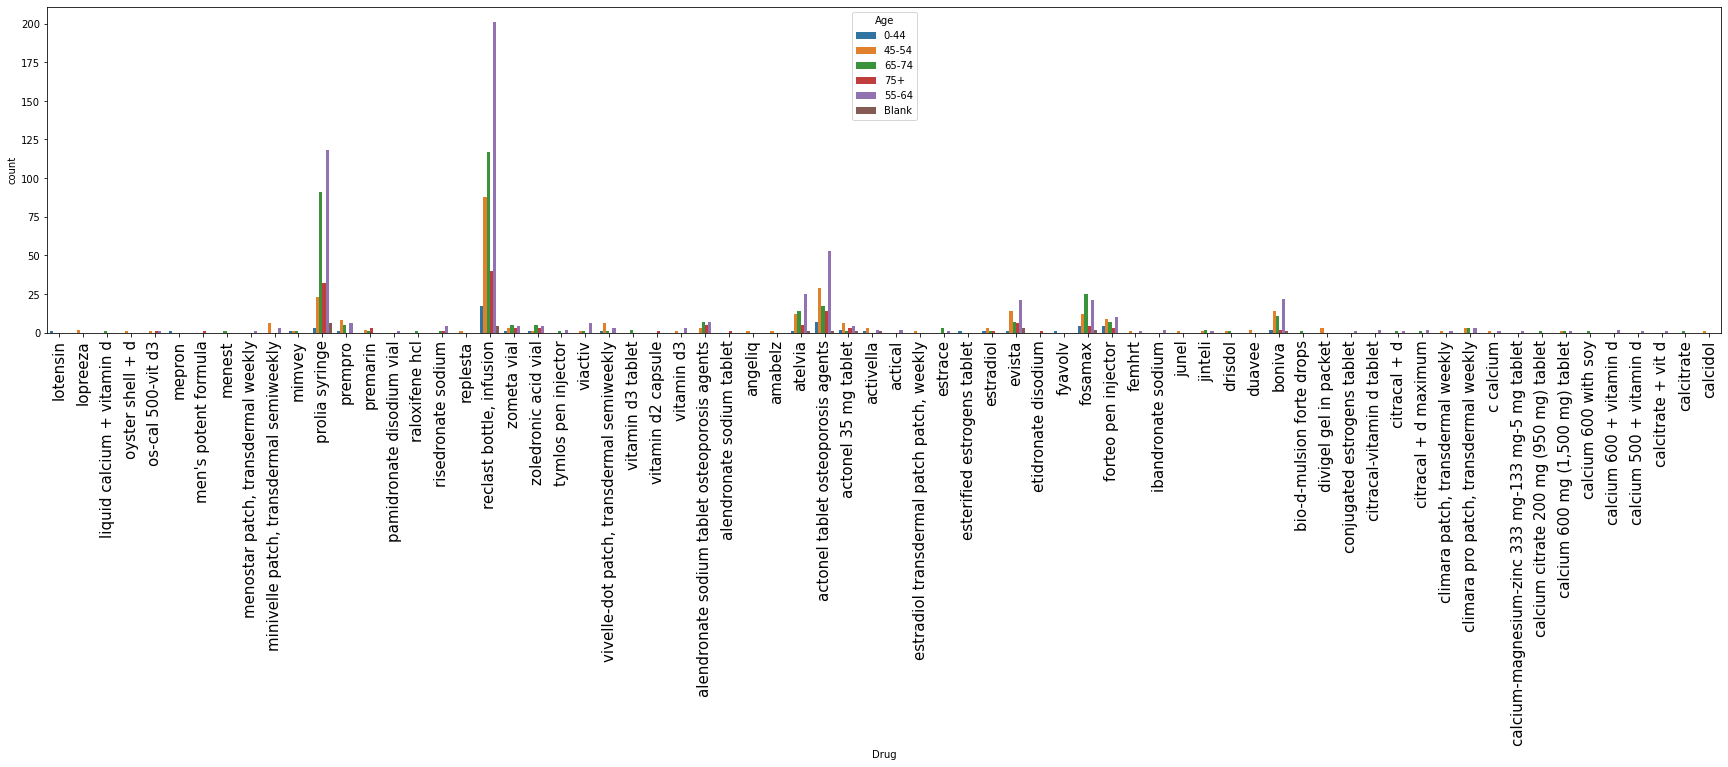

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

# Miscellaneous

Text(0.5, 1.0, 'Top: The number of drugs per condition.')

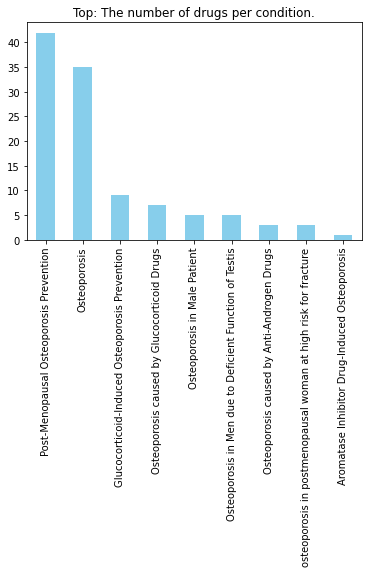

In [26]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar",color="skyblue")
plt.xlabel("")
plt.ylabel("")
plt.title("Top: The number of drugs per condition.")

#figsize = (14,6), fontsize = 10,

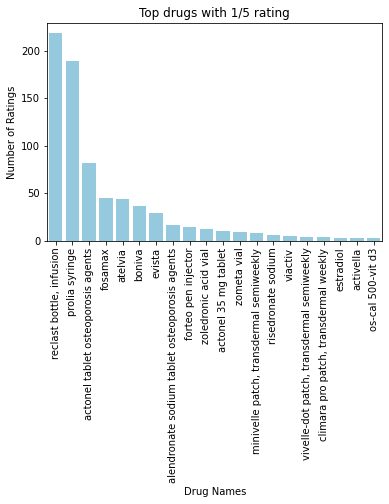

In [27]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color = 'skyblue')

sns_rating.set_title('Top drugs with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [28]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in df_ost.Condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_ost[df_ost.Condition == i].Drug.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_ost.Drug == j) >= 10:
            temp_ls.append((j, np.sum(df_ost[df_ost.Drug == j].Satisfaction) / np.sum(df_ost.Drug == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

# Review Categories

In [29]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

c:\Users\Blaise.Derenze\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


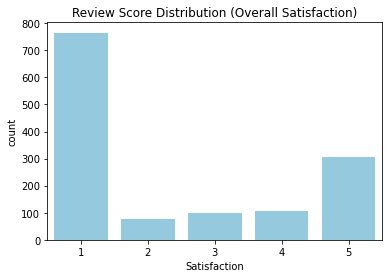

c:\Users\Blaise.Derenze\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


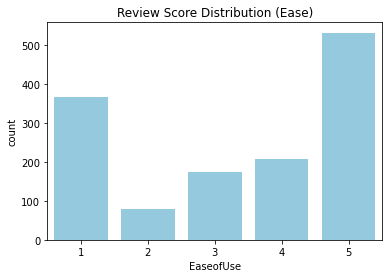

c:\Users\Blaise.Derenze\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


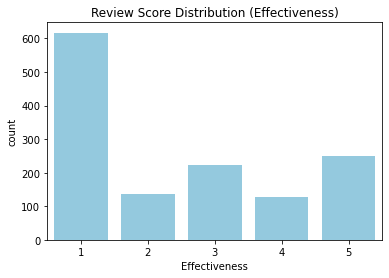

In [54]:
plt.title("Review Score Distribution (Overall Satisfaction)")
sns.countplot(df_ost['Satisfaction'], color = "skyblue")
plt.show()
plt.title("Review Score Distribution (Ease)")
sns.countplot(df_ost['EaseofUse'], color = "skyblue")
plt.show()
plt.title("Review Score Distribution (Effectiveness)")
sns.countplot(df_ost['Effectiveness'], color = "skyblue")
plt.show()

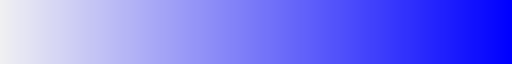

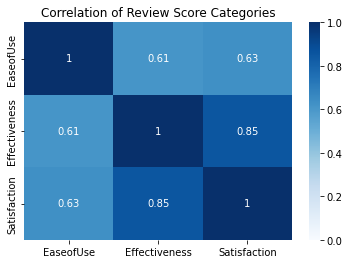

In [31]:
plt.title('Correlation of Review Score Categories')
sns.heatmap(df_ost[['EaseofUse', 'Effectiveness', 'Satisfaction']].corr(), annot = True, fmt='.2g', cmap = "Blues", vmin = 0, vmax = 1)
sns.color_palette("light:blue", as_cmap=True)
#should make diagonal maybe

Effectiveness more correlated with satisfaction 

In [32]:
from copy import deepcopy as copy

In [33]:
review_df = copy(df_ost)
review_df = review_df[review_df['Age']!= 'Blank']
review_df.sort_values(['Age'], ascending=[True])


,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
4147,0-44,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0
147988,0-44,Osteoporosis,2009-11-21,"reclast bottle, infusion",148235,5,2,I took the Reclast Iv after learning I had ost...,2,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",19
244686,0-44,Osteoporosis,2011-09-01,actonel tablet osteoporosis agents,16383,3,2,I took Acotonel for 2.5 years. My bone density...,1,Female,Upset stomach may occur.,33
277612,0-44,Osteoporosis caused by Glucocorticoid Drugs,2008-03-12,forteo pen injector,64474,1,1,MY MOTHER WAS TAKING YHIS DRUG FOR ABOUT 3 MON...,1,Female,Dizziness or fast heartbeat may occur within ...,22
277599,0-44,Post-Menopausal Osteoporosis Prevention,2009-07-03,fosamax,1273,1,2,begining of osteopin,2,Female,"Stomach pain , constipation , diarrhea , gas...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
145572,75+,Osteoporosis,2015-05-07,"reclast bottle, infusion",148235,5,5,Iam a 79 year old female. I had my first Recl...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",43
244736,75+,Osteoporosis,2011-03-23,actonel tablet osteoporosis agents,16383,4,3,I began taking Foxamax ten years ago. When I w...,4,Female,Upset stomach may occur.,16
173891,75+,Glucocorticoid-Induced Osteoporosis Prevention,2010-03-16,zoledronic acid vial,21754,1,2,bad nausea,1,Female,"Dizziness , headache , tiredness, or flu -li...",7
147139,75+,Osteoporosis,2011-04-05,"reclast bottle, infusion",148235,4,1,I had taken Actonel for several years and kept...,1,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",39


## Trying to determine what is driving reviews

In [34]:
importance = []
for row in review_df.iloc:
    effective_dif = abs(row['Satisfaction'] - row['Effectiveness'])
    #How close is the effectiveness rating to the overall rating

    ease_dif = abs(row['Satisfaction'] - row['EaseofUse'])

    #How close is the ease of use rating to the overall rating
    if(effective_dif > ease_dif):
        importance.append('EaseofUse')
    elif(effective_dif < ease_dif):
        importance.append('Effectiveness')
    elif((effective_dif > 1) & (ease_dif > 1)):
        importance.append('Neither')
    else:
        importance.append('Equal')
review_df['Importance'] = importance

Maybe a bit hack-y? 

Might still be interesting to look at how many products still got a low review with a high score in ease/effectiveness in a better way? 

Might need to standardize as expectations (and thus distributions) are different for ease of use and effectiveness??

Maybe a decision tree representation is better?

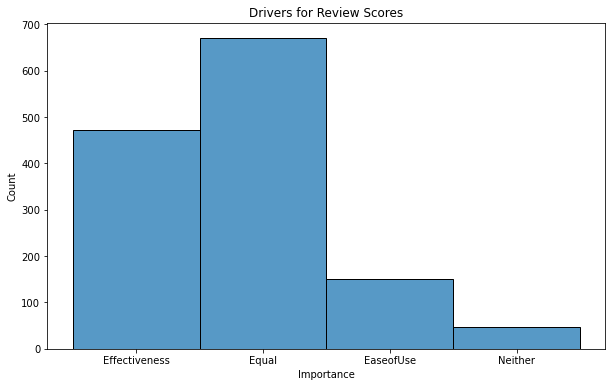

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Drivers for Review Scores')
sns_bar = sns.histplot(x = 'Importance', data = review_df)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15)
plt.show()

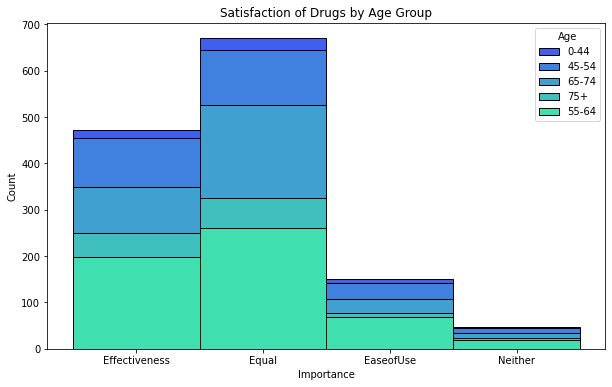

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Satisfaction of Drugs by Age Group')
sns_bar = sns.histplot(x = 'Importance', hue = 'Age', multiple = "stack", data = review_df, palette = "winter")
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15)
plt.show()

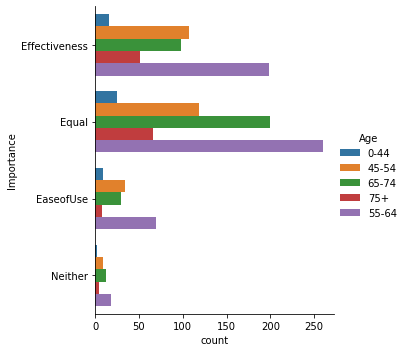

In [37]:
sns_bar = sns.catplot(y = 'Importance', hue = 'Age', kind = 'count', data = review_df)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15)
pass

## Breakdown of Good and Bad Reviews

In [38]:
bad_df = review_df[review_df['Satisfaction']<3]
bad_df.sort_values(['Age'], ascending=[True])

good_df = review_df[review_df['Satisfaction'] >3]
good_df.sort_values(['Age'], ascending=[True])


,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Importance
147452,0-44,Osteoporosis,2010-11-22,"reclast bottle, infusion",148235,5,5,I too almost canceled my infusion after readin...,5,,"Nausea , tiredness, flu -like symptoms (e.g.,...",50,Equal
145437,0-44,Osteoporosis caused by Glucocorticoid Drugs,2015-10-26,"reclast bottle, infusion",148235,5,5,"I had this done in March 2015 It was painless,...",5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",2,Equal
146418,0-44,Osteoporosis,2011-12-14,"reclast bottle, infusion",148235,5,4,"After being diagnosed with osteoporosis at 40,...",4,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",27,Effectiveness
146944,0-44,Osteoporosis,2011-07-08,"reclast bottle, infusion",148235,5,3,I had the infusion on June 6. Had the expected...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",12,EaseofUse
147572,0-44,Osteoporosis,2010-06-01,"reclast bottle, infusion",148235,5,3,Won't know effectiveness until July 2010 with ...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",9,EaseofUse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145878,75+,Post-Menopausal Osteoporosis Prevention,2013-09-09,"reclast bottle, infusion",148235,5,5,I have been treated with Reclast for three yea...,5,Female,"Nausea , tiredness, flu -like symptoms (e.g.,...",3,Equal
173887,75+,Osteoporosis,2013-12-11,zoledronic acid vial,21754,5,5,So far as I know I have not had any problems w...,5,Male,"Dizziness , headache , tiredness, or flu -li...",17,Equal
276952,75+,Osteoporosis caused by Glucocorticoid Drugs,2014-07-05,forteo pen injector,64474,3,5,Injected Forteo for 2 years and results were a...,5,Female,Dizziness or fast heartbeat may occur within ...,2,Effectiveness
109143,75+,Osteoporosis in Men due to Deficient Function ...,2015-09-12,prolia syringe,154218,5,5,Took Reclast infusions for 3 years annually. H...,5,Female,,6,Equal


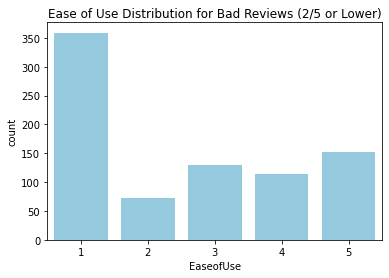

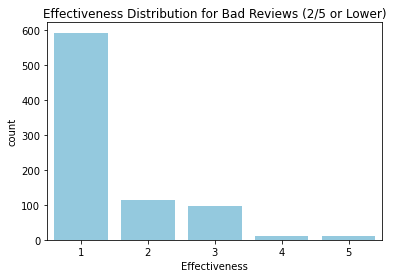

In [51]:
plt.title("Ease of Use Distribution for Bad Reviews (2/5 or Lower)")
sns.countplot(x = 'EaseofUse', data = bad_df, color = 'skyblue')
plt.show()
plt.title("Effectiveness Distribution for Bad Reviews (2/5 or Lower)")
sns.countplot(x = 'Effectiveness', data = bad_df, color = 'skyblue')
plt.show()

In [41]:
good_df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Importance
6207,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1,Equal
18993,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,Equal
97290,65-74,Post-Menopausal Osteoporosis Prevention,2014-06-16,menest,1792,4,4,I switched from Premarin to this medication an...,4,Female,"Stomach upset, nausea / vomiting , bloating...",0,Equal
97300,55-64,Post-Menopausal Osteoporosis Prevention,2008-02-13,"menostar patch, transdermal weekly",91304,5,5,I have been on menostar for three years and lo...,5,Female,Skin redness/irritation at the application si...,2,Equal
102207,0-44,Post-Menopausal Osteoporosis Prevention,2016-08-14,mimvey,154151,5,5,I am on my 4th year of taking this medication....,5,,"Stomach upset, nausea / vomiting , bloating...",1,Equal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360001,55-64,Osteoporosis,2013-07-18,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,2115,4,5,I started using this supplement for achy legs....,5,Female,,1,Effectiveness
360226,65-74,Post-Menopausal Osteoporosis Prevention,2010-02-12,calcium 600 with soy,74961,5,5,I started taking this more than 10 years ago a...,5,Female,,1,Equal
360231,55-64,Osteoporosis,2010-11-15,calcium 600 + vitamin d,93224,4,5,The only thing I have to say against these tab...,4,Female,Constipation or stomach upset may occur.,11,EaseofUse
360237,55-64,Osteoporosis,2016-03-16,calcium 500 + vitamin d,151589,4,4,Just started taking this a month ago. Definite...,4,,Constipation or stomach upset may occur.,1,Equal


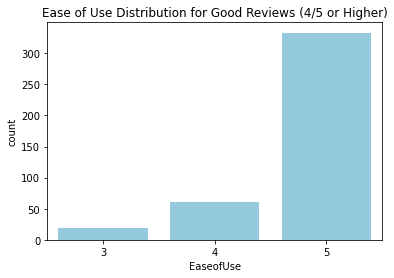

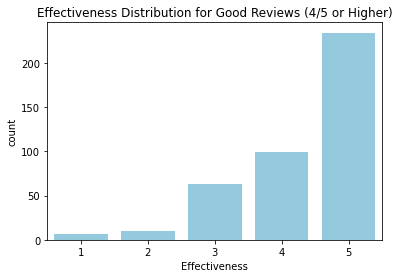

In [48]:
plt.title("Ease of Use Distribution for Good Reviews (4/5 or Higher)")
sns.countplot(x = 'EaseofUse', data = good_df, color= 'skyblue')
plt.show()
plt.title("Effectiveness Distribution for Good Reviews (4/5 or Higher)")
sns.countplot(x = 'Effectiveness', data = good_df, color= 'skyblue')
plt.show()

# Looking into drug mode again

In [ ]:
drugs = list(review_df['Drug'].unique())

In [ ]:
injectable_drugs = ['prolia syringe','reclast bottle, infusion','zometa vial','zoledronic acid vial']

infused_drugs = ['liquid calcium + vitamin d', 'oyster shell + d', 'atelvia','actonel tablet osteoporosis agents','actonel 35 mg tablet','calcium citrate 200 mg (950 mg) tablet',
       'calcium 600 mg (1,500 mg) tablet', 'calcium 600 + vitamin d',
       'calcitrate + vit d', 'citracal-vitamin d tablet',
       'citracal + d', 'citracal + d maximum', 'c calcium',
       'calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet', 'vitamin d3 tablet',
 'vitamin d3', 'os-cal 500-vit d3', 'risedronate sodium', 'bio-d-mulsion forte drops', 'risedronate sodium', 'replesta',
 'duavee','viactiv', 'actical','calcitrate', 'drisdol']

#should return an empty list here
[drug for drug in drugs if((drug not in injectable_drugs)&(drug not in infused_drugs))]

[]

In [ ]:
infused_df = review_df[review_df["Drug"].isin(infused_drugs)]
injected_df = review_df[review_df["Drug"].isin(injectable_drugs)]


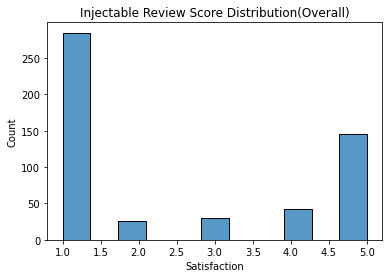

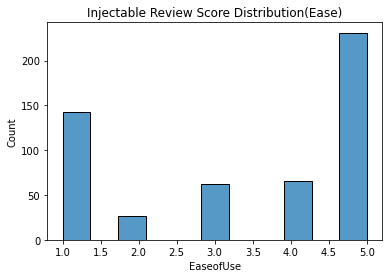

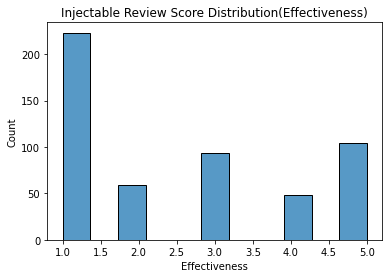

In [ ]:
plt.title("Injectable Review Score Distribution(Overall)")
sns.histplot(injected_df['Satisfaction'])
plt.show()
plt.title("Injectable Review Score Distribution(Ease)")
sns.histplot(injected_df['EaseofUse'])
plt.show()
plt.title("Injectable Review Score Distribution(Effectiveness)")
sns.histplot(injected_df['Effectiveness'])
plt.show()
        

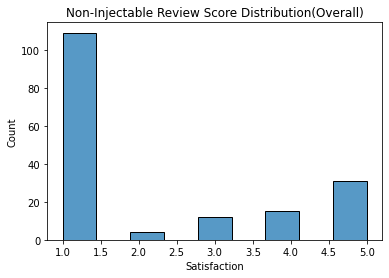

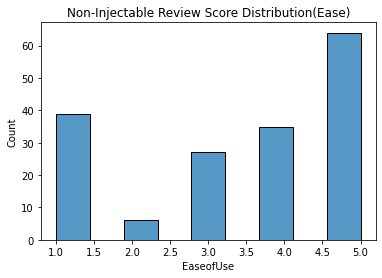

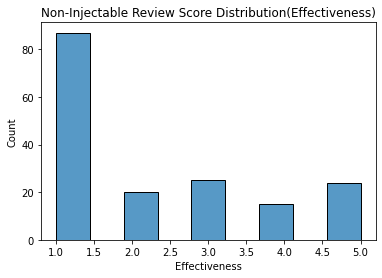

In [ ]:
plt.title("Non-Injectable Review Score Distribution(Overall)")
sns.histplot(infused_df['Satisfaction'])
plt.show()
plt.title("Non-Injectable Review Score Distribution(Ease)")
sns.histplot(infused_df['EaseofUse'])
plt.show()
plt.title("Non-Injectable Review Score Distribution(Effectiveness)")
sns.histplot(infused_df['Effectiveness'])
plt.show()
        

# Considering Usefulness

<AxesSubplot:xlabel='UsefulCount', ylabel='Count'>

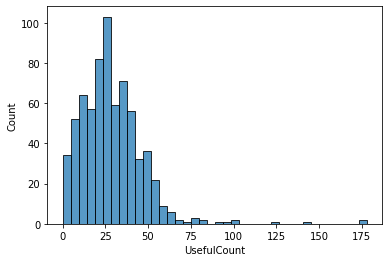

In [ ]:
sns.histplot(review_df['UsefulCount'])

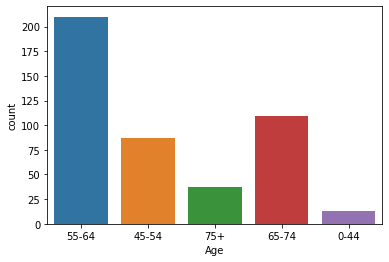

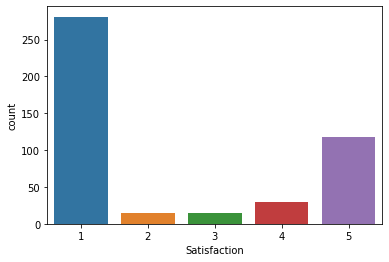

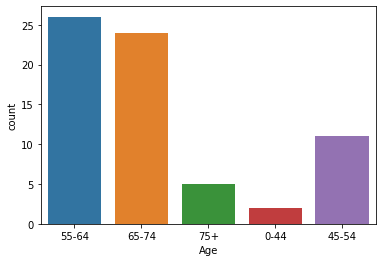

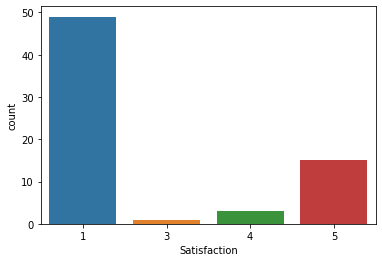

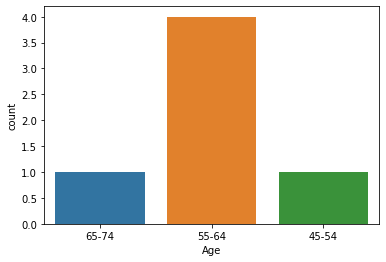

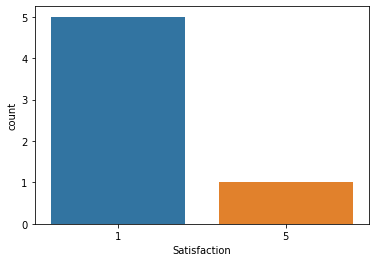

In [ ]:
sns.countplot(x = 'Age', data = review_df[review_df['UsefulCount']> 20])
plt.show()
sns.countplot(x = 'Satisfaction', data = review_df[review_df['UsefulCount']> 20])
plt.show()
sns.countplot(x = 'Age', data = review_df[review_df['UsefulCount']> 50])
plt.show()
sns.countplot(x = 'Satisfaction', data = review_df[review_df['UsefulCount']> 50])
plt.show()
sns.countplot(x = 'Age', data = review_df[review_df['UsefulCount']> 100])
plt.show()
sns.countplot(x = 'Satisfaction', data = review_df[review_df['UsefulCount']> 100])
plt.show()


In [ ]:
#def weight_by_usefulness(df, col1, col2):
new_df = pd.DataFrame(columns=['Age', 'Satisfaction'])
for row in review_df.iloc:
    for i in range(row['UsefulCount']):
        new_df.loc[len(new_df.index)] = [row['Age'], row['Satisfaction']]
new_df


,Age,Satisfaction
0,65-74,5
1,45-54,1
2,45-54,1
3,75+,1
4,55-64,1
...,...,...
19949,55-64,4
19950,55-64,4
19951,55-64,1
19952,55-64,1


<AxesSubplot:xlabel='Satisfaction', ylabel='Count'>

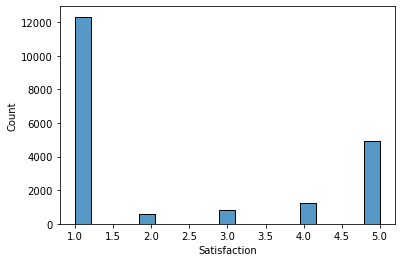

In [ ]:
sns.histplot(new_df['Satisfaction'])

In [ ]:
np.mean(review_df['UsefulCount'])

28.546494992846924

# Group Review by 3 Years

In [ ]:
df_drugs.groupby(['Drug','Year'])['Satisfaction'].agg(count='size', mean='mean').reset_index()

,Drug,Year,count,mean
0,actonel 35 mg tablet,2007,2,3.500000
1,actonel 35 mg tablet,2008,9,2.000000
2,"reclast bottle, infusion",2009,69,2.768116
3,"reclast bottle, infusion",2010,98,2.857143
4,"reclast bottle, infusion",2011,65,2.830769
5,"reclast bottle, infusion",2012,13,2.692308
6,"reclast bottle, infusion",2013,24,2.416667
7,"reclast bottle, infusion",2014,26,2.923077
8,"reclast bottle, infusion",2015,28,3.000000
9,"reclast bottle, infusion",2016,8,3.500000


<AxesSubplot:xlabel='Year', ylabel='Satisfaction'>

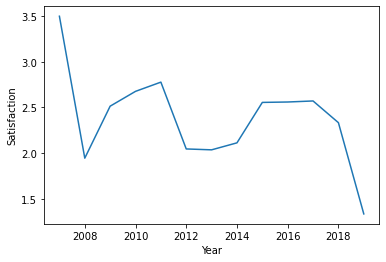

In [ ]:
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_ost.groupby(["Year"])["Satisfaction"].mean().reset_index())

In [ ]:
df_ost['Reviews']

18993     since I have a hard time swallowing this hs wo...
61145     I have severe pain in my hand and muscle joint...
72313     Food dyes and talc...large pill for a newly re...
72316     I am 64 years old, and am trying to avoid loss...
108510    Bone muscle aches, back pain, headaches, chill...
                                ...                        
360108    Marked laxative effect - am having to disconti...
360222    Unable to take Statins, major cramping in legs...
360231    The only thing I have to say against these tab...
360264    This supplement has caused much gas, bloating,...
360298    first dose: one tablet knocked me out cold for...
Name: Reviews, Length: 706, dtype: object